In [176]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

# If that didn't work try using the local host URL as shown in the video

In [178]:
type(data)

dict

In [180]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [230]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11928,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19821546.00000,19821546.00000,False,NaN,1,None,None,None,2025-02-08T16:04:00.000Z,95964.61119,36857359408.31376,-29.35880,-0.04982,-1.97885,-6.00137,1.71574,0.17855,20.38693,1902166955039.01147,60.88910,2015256834952.18994,None,2025-02-08T16:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-08 18:16:58.361970
1,1027,Ethereum,ETH,ethereum,9919,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120533298.03714,120533298.03714,True,NaN,2,None,None,None,2025-02-08T16:04:00.000Z,2606.62275,24411248884.81264,-14.13550,-0.22261,-3.66468,-19.91472,-21.49102,-27.13239,-18.75918,314184836689.72406,10.05720,314184836689.71997,None,2025-02-08T16:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-08 18:16:58.361970
2,825,Tether USDt,USDT,tether,115851,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,141664621553.59421,143570570332.03564,True,NaN,3,None,None,None,2025-02-08T16:04:00.000Z,0.99987,80276941546.93451,-23.56800,-0.01182,-0.02779,-0.00865,0.00831,-0.05291,-0.08455,141646150292.02979,4.53420,143551850559.04001,None,2025-02-08T16:04:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-02-08 18:16:58.361970
3,52,XRP,XRP,xrp,1525,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,57762545657.00000,99986504676.00000,False,NaN,4,None,None,None,2025-02-08T16:04:00.000Z,2.39161,5887847842.40830,-34.70720,-0.87234,-2.70405,-19.55026,2.99951,16.55422,295.54880,138145227750.98163,4.42010,239160560151.39001,None,2025-02-08T16:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-08 18:16:58.361970
4,5426,Solana,SOL,solana,837,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,487826712.29460,593667811.11243,True,NaN,5,None,None,None,2025-02-08T16:04:00.000Z,193.71789,2994933277.79578,-37.40140,-0.30898,-1.52722,-14.47392,0.71929,-6.87273,-8.76391,94500761175.32414,3.02360,115004075466.73000,None,2025-02-08T16:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-08 18:16:58.361970
5,1839,BNB,BNB,bnb,2350,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,142480084.35000,142480084.35000,False,NaN,6,None,None,None,2025-02-08T16:04:00.000Z,596.56167,1687110583.10668,4.93100,-1.03532,2.62511,-10.75889,-14.35030,-9.90569,-6.90388,84998157494.81163,2.72150,84998157494.81000,None,2025-02-08T16:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-08 18:16:58.361970
6,3408,USDC,USDC,usd-coin,25550,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,56075629710.93467,56075629710.93467,False,NaN,7,None,None,None,2025-02-08T16:04:00.000Z,0.99990,6787030214.92487,-25.51350,-0.01430,0.01667,-0.02547,-0.01818,-0.00540,-0.00243,56070266540.67258,1.79400,56070266540.67000,None,2025-02-08T16:04:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-02-08 18:16:58.361970
7,74,Dogecoin,DOGE,dogecoin,1161,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,147961886383.70526,147961886383.70526,True,NaN,8,None,None,None,2025-02-08T16:04:00.000Z,0.24880,1358919497.74393,-36.10590,-0.44948,-1.72824,-22.83953,-25.56614,-34.18604,0.93240,36812348656.50861,1.17840,36812348656

In [232]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df2 = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df_append = pd.DataFrame(df2)
    df = pd.concat([df2,df_append])
    
    #if not os.path.isfile(r'C:\Users\zoroj\Desktop\Phyton\Scripts\API.csv'):
        #df.to_csv(r'C:\Users\zoroj\Desktop\Phyton\Scripts\API.csv', header = 'column_names')
    #else:
        #df.to_csv(r'C:\Users\zoroj\Desktop\Phyton\Scripts\API.csv', mode = 'a', header = False)

In [234]:
import os 
from time import time
from time import sleep 

for i in range(333):
    api_runner()
    print('API Runner Completed')
    sleep(60) #sleep for 1 min
exit()

API Runner Completed
API Runner Completed
API Runner Completed
API Runner Completed
API Runner Completed
API Runner Completed


KeyboardInterrupt: 

In [236]:
df72 = pd.read_csv(r'C:\Users\zoroj\Desktop\Phyton\Scripts\API.csv')
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11928,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19821531.00000,19821531.00000,False,NaN,1,NaN,NaN,NaN,2025-02-08T14:26:00.000Z,96046.29624,46592848892.86730,-6.79770,-0.11897,-3.63224,-5.85202,3.98977,-1.96113,20.22353,1903784638342.52881,60.75800,2016972221025.36011,NaN,2025-02-08T14:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-08 16:28:00.400882
1,1,1027,Ethereum,ETH,ethereum,9919,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120533298.03714,120533298.03714,True,NaN,2,NaN,NaN,NaN,2025-02-08T14:27:00.000Z,2607.74904,27936345999.23998,-4.91060,-0.01481,-6.64144,-19.77559,-19.35600,-29.98351,-18.62303,314320592006.91284,10.03430,314320592006.90997,NaN,2025-02-08T14:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-08 16:28:00.400882
2,2,825,Tether USDt,USDT,tether,115845,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'eth...",NaN,141664621553.59421,143570570332.03564,True,NaN,3,NaN,NaN,NaN,2025-02-08T14:27:00.000Z,1.00003,91349010601.86916,-12.33050,0.00780,-0.04534,0.02872,0.04850,-0.03111,-0.08099,141668228445.95801,4.52260,143574225751.35001,NaN,2025-02-08T14:27:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-02-08 16:28:00.400882
3,3,52,XRP,XRP,xrp,1525,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,57762545657.00000,99986504676.00000,False,NaN,4,NaN,NaN,NaN,2025-02-08T14:27:00.000Z,2.41283,7033970465.33309,-20.47380,0.23315,-4.17550,-19.06274,6.47660,10.41788,295.03965,139371025378.52444,4.44930,241282692432.09000,NaN,2025-02-08T14:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-08 16:28:00.400882
4,4,5426,Solana,SOL,solana,837,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,487828905.84590,593668168.28325,True,NaN,5,NaN,NaN,NaN,2025-02-08T14:26:00.000Z,194.47398,3585247283.48359,-23.05090,0.01126,-3.75458,-14.41962,4.00183,-10.46035,-6.97972,94870028696.08540,3.02770,115453011262.88000,NaN,2025-02-08T14:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-08 16:28:00.400882
5,5,1839,BNB,BNB,bnb,2350,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,142480106.49000,142480106.49000,False,NaN,6,NaN,NaN,NaN,2025-02-08T14:27:00.000Z,602.33386,1637257229.11191,-1.98670,2.48815,2.29605,-10.02098,-12.03899,-13.00667,-6.15317,85820591828.56712,2.73980,85820591828.57001,NaN,2025-02-08T14:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-08 16:28:00.400882
6,6,3408,USDC,USDC,usd-coin,25548,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,56121593960.78477,56121593960.78477,False,NaN,7,NaN,NaN,NaN,2025-02-08T14:26:00.000Z,0.99997,7963274340.08621,-9.52470,-0.00350,-0.02046,-0.00388,-0.00487,-0.01424,-0.01295,56120066856.77554,1.79100,56120066856.78000,NaN,2025-02-08T14:26:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-02-08 16:28:00.400882
7,7,74,Dogecoin,DOGE,dogecoin,1161,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,147961016383.70520,147961016383.70520,True,NaN,8,NaN,NaN,NaN,2025-02-08T14:27:00.000Z,0.24935,1594227052.42930,-26.92390,0.36898,-4.24031,-22.81513,-22.48627,-38.50669,0.52548,36894568745.12383,1.17750,36894568745.12000,N

In [238]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,11928,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19821568.00000,19821568.00000,False,NaN,1,None,None,None,2025-02-08T16:21:00.000Z,95807.88669,36002422111.78575,-33.02630,-0.25384,-2.76861,-5.98858,1.79498,0.08586,20.38373,1899062541041.89868,60.77320,2011965620574.51001,None,2025-02-08T16:21:00.000Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,9919,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120533298.03714,120533298.03714,True,NaN,2,None,None,None,2025-02-08T16:22:00.000Z,2595.70210,23965493351.06546,-16.83140,-0.63168,-4.56286,-20.13879,-21.47135,-27.82237,-18.79094,312868534926.17523,10.02380,312868534926.17999,None,2025-02-08T16:22:00.000Z,NaN,NaN,NaN,NaN,NaN
2,825,Tether USDt,USDT,tether,115852,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,141664621553.59421,143570570332.03564,True,NaN,3,None,None,None,2025-02-08T16:21:00.000Z,0.99998,79164806285.76439,-25.57500,-0.01317,-0.05397,0.01910,0.01776,-0.04285,-0.07874,141661559942.99399,4.53140,143567467530.67999,None,2025-02-08T16:21:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
3,52,XRP,XRP,xrp,1525,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,57762545657.00000,99986504676.00000,False,NaN,4,None,None,None,2025-02-08T16:22:00.000Z,2.38260,5798684893.59770,-35.61350,-1.22576,-4.02032,-19.84936,3.02864,15.60658,296.92573,137624941698.22739,4.40420,238259827597.38000,None,2025-02-08T16:22:00.000Z,NaN,NaN,NaN,NaN,NaN
4,5426,Solana,SOL,solana,837,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,487826482.43994,593667675.17614,True,NaN,5,None,None,None,2025-02-08T16:22:00.000Z,193.62208,2955829199.79273,-37.72270,-0.45855,-2.19659,-14.24456,0.97471,-7.42402,-7.71138,94453976478.48347,3.02140,114947167990.25999,None,2025-02-08T16:22:00.000Z,NaN,NaN,NaN,NaN,NaN
5,1839,BNB,BNB,bnb,2350,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,142480080.54000,142480080.54000,False,NaN,6,None,None,None,2025-02-08T16:22:00.000Z,600.53373,1704939268.04935,6.49120,0.57960,2.65572,-10.00822,-13.58892,-8.98112,-5.72704,85564093901.67293,2.74170,85564093901.67000,None,2025-02-08T16:22:00.000Z,NaN,NaN,NaN,NaN,NaN
6,3408,USDC,USDC,usd-coin,25550,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,56076723964.31970,56076723964.31970,False,NaN,7,None,None,None,2025-02-08T16:22:00.000Z,0.99995,6690240346.87831,-28.31470,-0.00513,-0.01846,-0.00670,-0.01591,-0.00401,0.00056,56073814278.01112,1.79370,56073814278.01000,None,2025-02-08T16:22:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
7,74,Dogecoin,DOGE,dogecoin,1161,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,147962156383.70523,147962156383.70523,True,NaN,8,None,None,None,2025-02-08T16:22:00.000Z,0.24809,1337031552.10460,-36.75380,-0.87049,-2.69030,-22.85470,-25.25883,-34.58246,-0.87242,36707989638.38012,1.17420,36707989638.38000,None,2025-02-08T16:22:00.000Z,NaN,NaN,NaN,NaN,NaN
8,2010,Cardano,ADA,cardano,1458,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35193500774.4423

In [240]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [242]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,11928,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19821568.00000,19821568.00000,False,NaN,1,None,None,None,2025-02-08T16:21:00.000Z,95807.88669,36002422111.78575,-33.02630,-0.25384,-2.76861,-5.98858,1.79498,0.08586,20.38373,1899062541041.89868,60.77320,2011965620574.51001,None,2025-02-08T16:21:00.000Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,9919,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120533298.03714,120533298.03714,True,NaN,2,None,None,None,2025-02-08T16:22:00.000Z,2595.70210,23965493351.06546,-16.83140,-0.63168,-4.56286,-20.13879,-21.47135,-27.82237,-18.79094,312868534926.17523,10.02380,312868534926.17999,None,2025-02-08T16:22:00.000Z,NaN,NaN,NaN,NaN,NaN
2,825,Tether USDt,USDT,tether,115852,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,141664621553.59421,143570570332.03564,True,NaN,3,None,None,None,2025-02-08T16:21:00.000Z,0.99998,79164806285.76439,-25.57500,-0.01317,-0.05397,0.01910,0.01776,-0.04285,-0.07874,141661559942.99399,4.53140,143567467530.67999,None,2025-02-08T16:21:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
3,52,XRP,XRP,xrp,1525,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,57762545657.00000,99986504676.00000,False,NaN,4,None,None,None,2025-02-08T16:22:00.000Z,2.38260,5798684893.59770,-35.61350,-1.22576,-4.02032,-19.84936,3.02864,15.60658,296.92573,137624941698.22739,4.40420,238259827597.38000,None,2025-02-08T16:22:00.000Z,NaN,NaN,NaN,NaN,NaN
4,5426,Solana,SOL,solana,837,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,487826482.43994,593667675.17614,True,NaN,5,None,None,None,2025-02-08T16:22:00.000Z,193.62208,2955829199.79273,-37.72270,-0.45855,-2.19659,-14.24456,0.97471,-7.42402,-7.71138,94453976478.48347,3.02140,114947167990.25999,None,2025-02-08T16:22:00.000Z,NaN,NaN,NaN,NaN,NaN
5,1839,BNB,BNB,bnb,2350,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,142480080.54000,142480080.54000,False,NaN,6,None,None,None,2025-02-08T16:22:00.000Z,600.53373,1704939268.04935,6.49120,0.57960,2.65572,-10.00822,-13.58892,-8.98112,-5.72704,85564093901.67293,2.74170,85564093901.67000,None,2025-02-08T16:22:00.000Z,NaN,NaN,NaN,NaN,NaN
6,3408,USDC,USDC,usd-coin,25550,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,56076723964.31970,56076723964.31970,False,NaN,7,None,None,None,2025-02-08T16:22:00.000Z,0.99995,6690240346.87831,-28.31470,-0.00513,-0.01846,-0.00670,-0.01591,-0.00401,0.00056,56073814278.01112,1.79370,56073814278.01000,None,2025-02-08T16:22:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
7,74,Dogecoin,DOGE,dogecoin,1161,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,147962156383.70523,147962156383.70523,True,NaN,8,None,None,None,2025-02-08T16:22:00.000Z,0.24809,1337031552.10460,-36.75380,-0.87049,-2.69030,-22.85470,-25.25883,-34.58246,-0.87242,36707989638.38012,1.17420,36707989638.38000,None,2025-02-08T16:22:00.000Z,NaN,NaN,NaN,NaN,NaN
8,2010,Cardano,ADA,cardano,1458,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35193500774.4423

In [244]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.25384,-2.76861,-5.98858,1.79498,0.08586,20.38373
Ethereum,-0.63168,-4.56286,-20.13879,-21.47135,-27.82237,-18.79094
Tether USDt,-0.01317,-0.05397,0.01910,0.01776,-0.04285,-0.07874
XRP,-1.22576,-4.02032,-19.84936,3.02864,15.60658,296.92573
Solana,-0.45855,-2.19659,-14.24456,0.97471,-7.42402,-7.71138
BNB,0.57960,2.65572,-10.00822,-13.58892,-8.98112,-5.72704
USDC,-0.00513,-0.01846,-0.00670,-0.01591,-0.00401,0.00056
Dogecoin,-0.87049,-2.69030,-22.85470,-25.25883,-34.58246,-0.87242
Cardano,-1.47420,-6.38484,-26.09236,-26.07592,-27.85825,12.10385


In [246]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.25384
             quote.USD.percent_change_24h    -2.76861
             quote.USD.percent_change_7d     -5.98858
             quote.USD.percent_change_30d     1.79498
             quote.USD.percent_change_60d     0.08586
             quote.USD.percent_change_90d    20.38373
Ethereum     quote.USD.percent_change_1h     -0.63168
             quote.USD.percent_change_24h    -4.56286
             quote.USD.percent_change_7d    -20.13879
             quote.USD.percent_change_30d   -21.47135
             quote.USD.percent_change_60d   -27.82237
             quote.USD.percent_change_90d   -18.79094
Tether USDt  quote.USD.percent_change_1h     -0.01317
             quote.USD.percent_change_24h    -0.05397
             quote.USD.percent_change_7d      0.01910
             quote.USD.percent_change_30d     0.01776
             quote.USD.percent_change_60d    -0.04285
             quote.USD.percent_change_90

In [248]:
type(df4)

pandas.core.series.Series

In [250]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.25384
            quote.USD.percent_change_24h  -2.76861
            quote.USD.percent_change_7d   -5.98858
            quote.USD.percent_change_30d   1.79498
            quote.USD.percent_change_60d   0.08586
            quote.USD.percent_change_90d  20.38373
Ethereum    quote.USD.percent_change_1h   -0.63168
            quote.USD.percent_change_24h  -4.56286
            quote.USD.percent_change_7d  -20.13879
            quote.USD.percent_change_30d -21.47135
            quote.USD.percent_change_60d -27.82237
            quote.USD.percent_change_90d -18.79094
Tether USDt quote.USD.percent_change_1h   -0.01317
            quote.USD.percent_change_24h  -0.05397
            quote.USD.percent_change_7d    0.01910
            quote.USD.percent_change_30d   0.01776
            quote.USD.percent_change_60d  -0.04285
            quote.USD.percent_change_90d  -0.07874
XRP         quote.USD.percent_change_1h   -1.22576
            quote.USD.percent_change_24h  -4.02032
            quote.USD.percent_change_7d  -19.84936
            quote.USD.percent_change_30d   3.02864
            quote.USD.percent_change_60d  15.60658
            quote.USD.percent_change_90d 296.92573
Solana      quote.USD.percent_change_1h   -0.45855
            quote.USD.percent_change_24h  -2.19659
            quote.USD.percent_change_7d  -14.24456
            quote.USD.percent_change_30d   0.97471
            quote.USD.percent_change_60d  -7.42402
            quote.USD.percent_change_90d  -7.71138
BNB         quote.USD.percent_change_1h    0.57960
            quote.USD.percent_change_24h   2.65572
            quote.USD.percent_change_7d  -10.00822
            quote.USD.percent_change_30d -13.58892
            quote.USD.percent_change_60d  -8.98112
            quote.USD.percent_change_90d  -5.72704
USDC        quote.USD.percent_change_1h   -0.00513
            quote.USD.percent_change_24h  -0.01846
            quote.USD.percent_change_7d   -0.00670
            quote.USD.percent_change_30d  -0.01591
            quote.USD.percent_change_60d  -0.00401
            quote.USD.percent_change_90d   0.00056
Dogecoin    quote.USD.percent_change_1h   -0.87049
            quote.USD.percent_change_24h  -2.69030
            quote.USD.percent_change_7d  -22.85470
            quote.USD.percent_change_30d -25.25883
            quote.USD.percent_change_60d -34.58246
            quote.USD.percent_change_90d  -0.87242
Cardano     quote.USD.percent_change_1h   -1.47420
            quote.USD.percent_change_24h  -6.38484
            quote.USD.percent_change_7d  -26.09236
            quote.USD.percent_change_30d -26.07592
            quote.USD.percent_change_60d -27.85825
            quote.USD.percent_change_90d  12.10385
TRON        quote.USD.percent_change_1h   -0.41653
            quote.USD.percent_change_24h  -1.15251
            quote.USD.percent_change_7d   -9.16533
            quote.USD.percent_change_30d  -6.04462
            quote.USD.percent_change_60d -10.98957
            quote.USD.percent_change_90d  38.74370
Chainlink   quote.USD.percent_change_1h   -0.87290
            quote.USD.percent_change_24h  -6.65546
            quote.USD.percent_change_7d  -26.70086
            quote.USD.percent_change_30d -10.74772
            quote.USD.percent_change_60d -15.96693
            quote.USD.percent_change_90d  23.36870
Avalanche   quote.USD.percent_change_1h   -0.88107
            quote.USD.percent_change_24h  -5.25736
            quote.USD.percent_change_7d  -28.21768
            quote.USD.percent_change_30d -35.00648
            quote.USD.percent_change_60d -43.33709
            quote.USD.percent_change_90d -24.77253
Stellar     quote.USD.percent_change_1h   -1.38872
            quote.USD.percent_change_24h  -5.01170
            quote.USD.percent_change_7d  -20.16276
            quote.USD.percent_change_30d -20.47396
            quote.USD.percent_change_60d -14.55865
            quo

In [208]:
df5.count()

values    90
dtype: int64

In [252]:
index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.reset_index().set_index(index)
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.25384
1,Bitcoin,quote.USD.percent_change_24h,-2.76861
2,Bitcoin,quote.USD.percent_change_7d,-5.98858
3,Bitcoin,quote.USD.percent_change_30d,1.79498
4,Bitcoin,quote.USD.percent_change_60d,0.08586
5,Bitcoin,quote.USD.percent_change_90d,20.38373
6,Ethereum,quote.USD.percent_change_1h,-0.63168
7,Ethereum,quote.USD.percent_change_24h,-4.56286
8,Ethereum,quote.USD.percent_change_7d,-20.13879
9,Ethereum,quote.USD.percent_change_30d,-21.47135


In [254]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.25384
1,Bitcoin,quote.USD.percent_change_24h,-2.76861
2,Bitcoin,quote.USD.percent_change_7d,-5.98858
3,Bitcoin,quote.USD.percent_change_30d,1.79498
4,Bitcoin,quote.USD.percent_change_60d,0.08586
5,Bitcoin,quote.USD.percent_change_90d,20.38373
6,Ethereum,quote.USD.percent_change_1h,-0.63168
7,Ethereum,quote.USD.percent_change_24h,-4.56286
8,Ethereum,quote.USD.percent_change_7d,-20.13879
9,Ethereum,quote.USD.percent_change_30d,-21.47135


In [256]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.25384
1,Bitcoin,24h,-2.76861
2,Bitcoin,7d,-5.98858
3,Bitcoin,30d,1.79498
4,Bitcoin,60d,0.08586
5,Bitcoin,90d,20.38373
6,Ethereum,quote.USD.percent_change_1h,-0.63168
7,Ethereum,24h,-4.56286
8,Ethereum,7d,-20.13879
9,Ethereum,30d,-21.47135


In [258]:
import seaborn as sns
import matplotlib.pyplot as plt

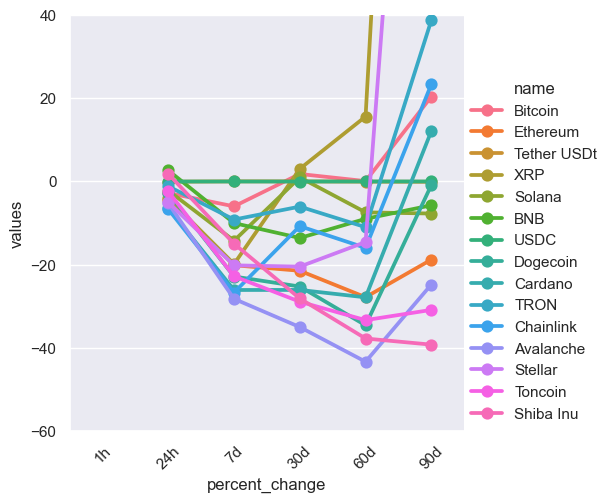

In [260]:
df7['percent_change'] = pd.Categorical(df7['percent_change'], 
                                       categories=['1h', '24h', '7d', '30d', '60d', '90d'], 
                                       ordered=True)

# Create the plot
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

# Set y-axis limits
plt.ylim(-60, 40)  # Adjust based on your data range

# Improve readability
plt.xticks(rotation=45)  # Rotate x-axis labels if needed

plt.show()